<a href="https://colab.research.google.com/github/jan-1995/Data_Science/blob/main/One_Sample_Ttest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

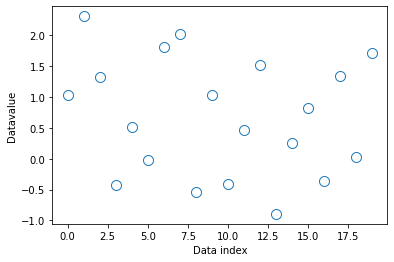

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: Legend does not support 'H' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: Legend does not support '_' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: Legend does not support 'O' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: Legend does not support ' ' instances.
A proxy artist may be used instead.
See: http://matp

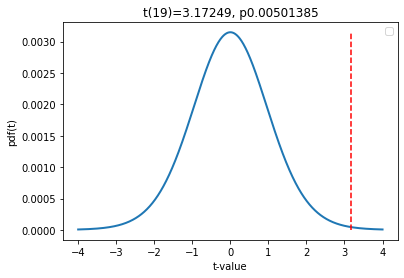

In [47]:
#Generate Data

N=20

popMu=0.5 #True population mean

#np.random.randn generates random noise 
data=np.random.randn(N,)+popMu

#Lets see what the data looks like
plt.plot(data,'o',markerfacecolor='w', markersize=10)
plt.xlabel('Data index')
plt.ylabel('Datavalue')
plt.show()
## T test

# null hypothesis value
HOval=0

# compute the t-value

t_num=np.mean(data)-HOval
#Always remember that in python the denominator degrees of freedom equals 1 if we are computing a 'sample' standard deviation
t_den=np.std(data, ddof=1)/np.sqrt(N)
tval=t_num/t_den

# degrees of freedom of a 1 sample t test is alwyas n-1
#because as soon as we know the mean, then we dont need all data points

df=N-1

# p value
#multiplied by two fro a 2 sided t test
pval=(1-stats.t.cdf(abs(tval),df))*2

# show the HO parameter distribution and observed t value

x=np.linspace(-4,4,1001)
tdist=stats.t.pdf(x,df)*np.mean(np.diff(x))

plt.plot(x,tdist,linewidth=2)
plt.plot([tval,tval],[0,max(tdist)],'r--')
plt.legend('H_O distribution','Observed t-value')
plt.xlabel('t-value')
plt.ylabel('pdf(t)')
plt.title('t(%g)=%g, p%g'%(df,tval,pval))
plt.show()


In [ ]:
## Int he above graph the blue line gives us the null hypothesis distribution, i.e., the probability density of a t value we can expect if the null hypothesis were true.
## what is the probability of observing a  t statistic of 3.32 or larger given that the null hypothesis were true, the p value is 0.001 which is very unlikely
##So we have sufficient evidence to reject the null hypothesis which is that the sample mean and the population mean are different and that it is unlikely that the sample was drawn fronm the distribution with mu=0

**lets look at the python function and see how that matches up**

In [48]:
t,p=stats.ttest_1samp(data,HOval)
print(t,p)
#the pvalues are off because the tolbox computes the two tailed t test

3.1724884578119976 0.0050138537280993815
